In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# 1. Data Understanding
# Load the dataset
file_path = 'airline_passenger_satisfaction.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [5]:
#Basic stat 
print(df.describe())

          Unnamed: 0            age  flight_distance  inflight_wifi_service  \
count  129880.000000  129880.000000    129880.000000          129880.000000   
mean    64939.500000      39.427957      1190.316392               2.728696   
std     37493.270818      15.119360       997.452477               1.329340   
min         0.000000       7.000000        31.000000               0.000000   
25%     32469.750000      27.000000       414.000000               2.000000   
50%     64939.500000      40.000000       844.000000               3.000000   
75%     97409.250000      51.000000      1744.000000               4.000000   
max    129879.000000      85.000000      4983.000000               5.000000   

       departure_arrival_time_convenient  ease_of_online_booking  \
count                      129880.000000           129880.000000   
mean                            3.057599                2.756876   
std                             1.526741                1.401740   
min             

In [7]:
# 2. Data Preparation
# Checking for null values
print("Null values in the dataset:\n", df.isnull().sum())


Null values in the dataset:
 Unnamed: 0                             0
Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                

In [9]:
# Fill missing values for numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())



In [11]:
# Fill missing values for categorical columns
categorical_columns = df.select_dtypes(include=[object]).columns
df[categorical_columns] = df[categorical_columns].fillna('unknown')

In [13]:
# Checking for null values
print("Null values in the dataset:\n", df.isnull().sum())

Null values in the dataset:
 Unnamed: 0                           0
Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64


In [15]:
# Remove the unnecessary 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

In [17]:
# print to check if values are handled
print(df.head())

   Gender      customer_type  age   type_of_travel customer_class  \
0    Male     Loyal Customer   13  Personal Travel       Eco Plus   
1    Male  disloyal Customer   25  Business travel       Business   
2  Female     Loyal Customer   26  Business travel       Business   
3  Female     Loyal Customer   25  Business travel       Business   
4    Male     Loyal Customer   61  Business travel       Business   

   flight_distance  inflight_wifi_service  departure_arrival_time_convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   ease_of_online_booking  gate_location  ...  inflight_entertainment  \
0                       3      

In [19]:
# Encode categorical variables using LabelEncoder for binary columns and pd.get_dummies for others
label_encoder = LabelEncoder()

# Apply label encoding to binary categorical columns (like 'Gender' and 'customer_type')
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['customer_type'] = label_encoder.fit_transform(df['customer_type'])
df['type_of_travel'] = label_encoder.fit_transform(df['type_of_travel'])

# Use pd.get_dummies() for other multi-category categorical columns
df = pd.get_dummies(df, columns=['customer_class'], drop_first=True)

# Display the first few rows of the preprocessed dataset
print(df.head())

   Gender  customer_type  age  type_of_travel  flight_distance  \
0       1              0   13               1              460   
1       1              1   25               0              235   
2       0              0   26               0             1142   
3       0              0   25               0              562   
4       1              0   61               0              214   

   inflight_wifi_service  departure_arrival_time_convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   ease_of_online_booking  gate_location  food_and_drink  ...  \
0                       3              1               5  ...   
1                       3              3               1  ...   
2                       2    

In [21]:
# Split the data into features and target
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

In [23]:
# Standardize the features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

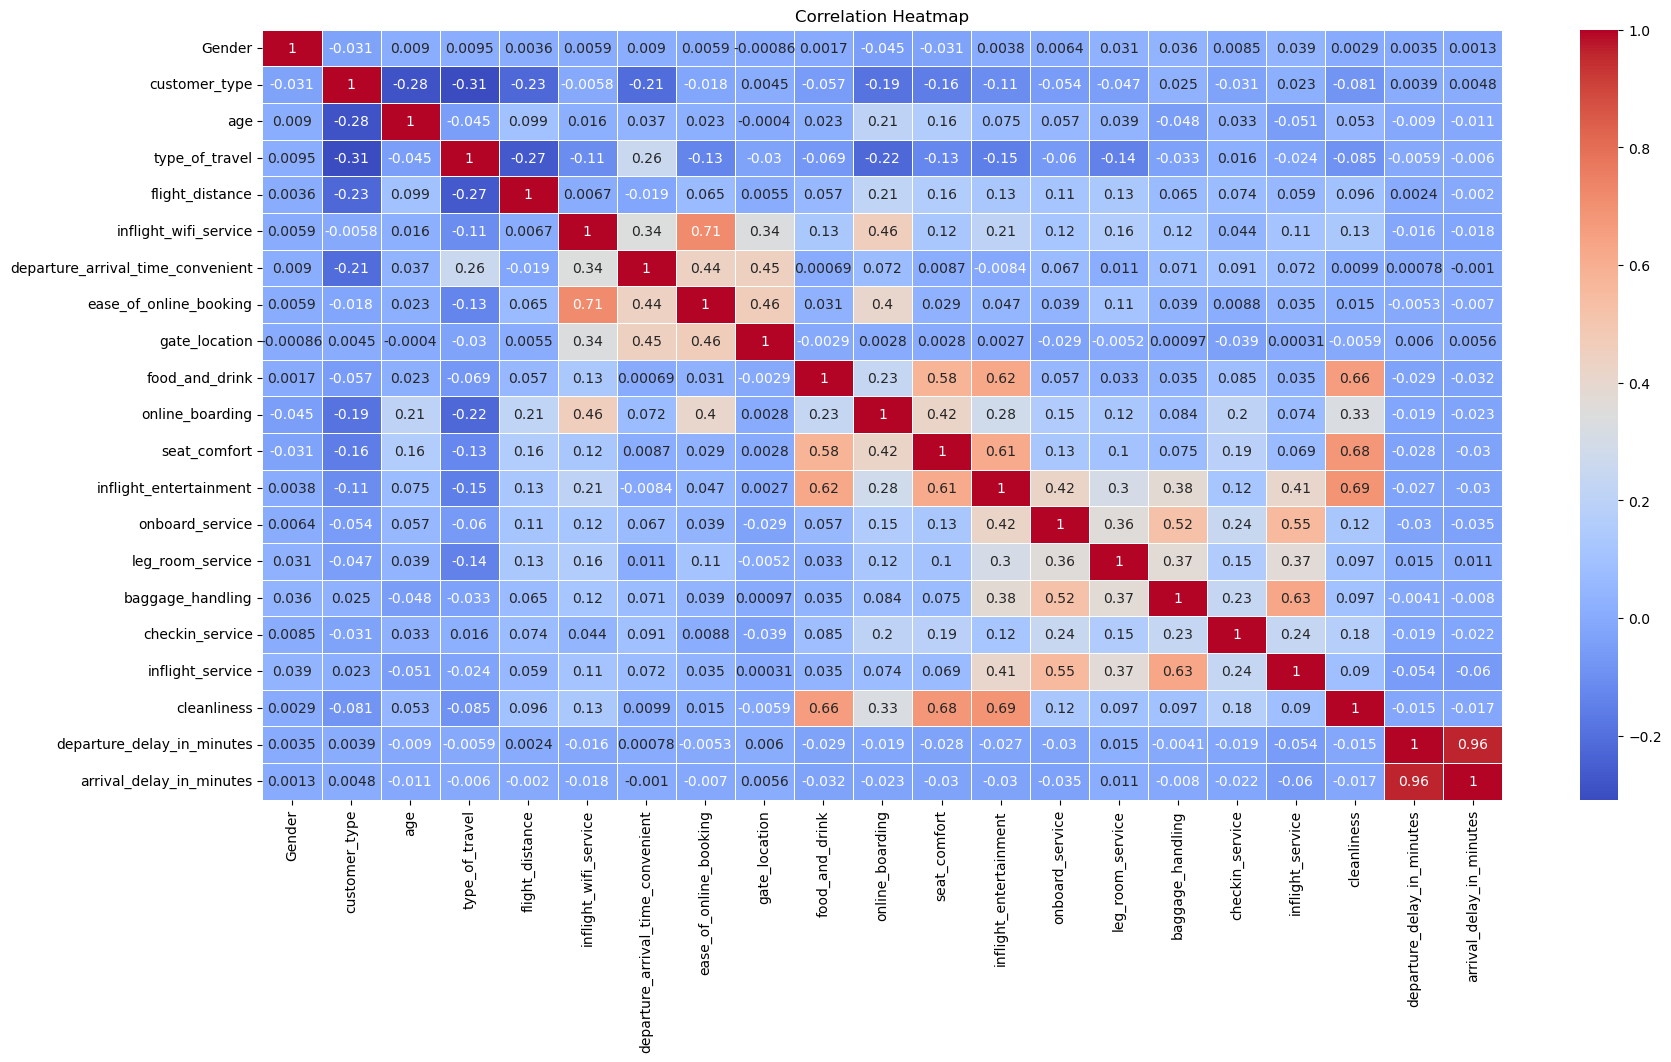

In [25]:
# 3. Data Visualization
# Drop non-numerical columns from the correlation computation
# Ensure that only numeric columns are considered
numeric_df = df.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
# 4. Feature Engineering (PCA)
# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)  # Choose the number of principal components
X_pca = pca.fit_transform(X_scaled)

In [41]:
# 5. Modeling
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {logreg_acc}')
print(classification_report(y_test, y_pred_logreg))

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {knn_acc}')
print(classification_report(y_test, y_pred_knn))

# Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
dtree_acc = accuracy_score(y_test, y_pred_dtree)
print(f'Decision Tree Accuracy: {dtree_acc}')
print(classification_report(y_test, y_pred_dtree))

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {nb_acc}')
print('Naive Bayes Classification Report:')
print(classification_report(y_test, y_pred_nb))


Logistic Regression Accuracy: 0.8395056975669849
                         precision    recall  f1-score   support

neutral or dissatisfied       0.84      0.88      0.86     14622
              satisfied       0.83      0.79      0.81     11354

               accuracy                           0.84     25976
              macro avg       0.84      0.83      0.84     25976
           weighted avg       0.84      0.84      0.84     25976

KNN Accuracy: 0.8808900523560209
                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.91      0.90     14622
              satisfied       0.88      0.84      0.86     11354

               accuracy                           0.88     25976
              macro avg       0.88      0.88      0.88     25976
           weighted avg       0.88      0.88      0.88     25976

Decision Tree Accuracy: 0.8383507853403142
                         precision    recall  f1-score   support

neutral or dissatisfied

In [43]:

# Displaying some actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_LogReg': y_pred_logreg,
    'Predicted_KNN': y_pred_knn,
    'Predicted_DTree': y_pred_dtree,
    'Predicted_NB': y_pred_nb
})

print("Sample of Actual vs. Predicted Values:")
print(results_df.head(10))


Sample of Actual vs. Predicted Values:
                         Actual         Predicted_LogReg  \
103044  neutral or dissatisfied  neutral or dissatisfied   
43282                 satisfied                satisfied   
65543   neutral or dissatisfied  neutral or dissatisfied   
65083   neutral or dissatisfied  neutral or dissatisfied   
76496                 satisfied                satisfied   
78319   neutral or dissatisfied  neutral or dissatisfied   
43712   neutral or dissatisfied  neutral or dissatisfied   
8092    neutral or dissatisfied  neutral or dissatisfied   
105253                satisfied                satisfied   
71027                 satisfied                satisfied   

                  Predicted_KNN          Predicted_DTree  \
103044  neutral or dissatisfied                satisfied   
43282   neutral or dissatisfied  neutral or dissatisfied   
65543   neutral or dissatisfied  neutral or dissatisfied   
65083   neutral or dissatisfied  neutral or dissatisfied   


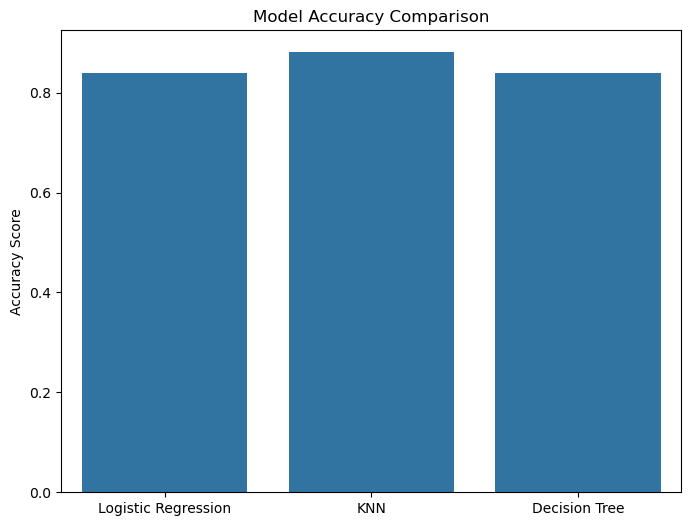

In [31]:
# 6. Model Evaluation



C:\Users\kiran\AppData\Local\Temp\ipykernel_1708\1873805569.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


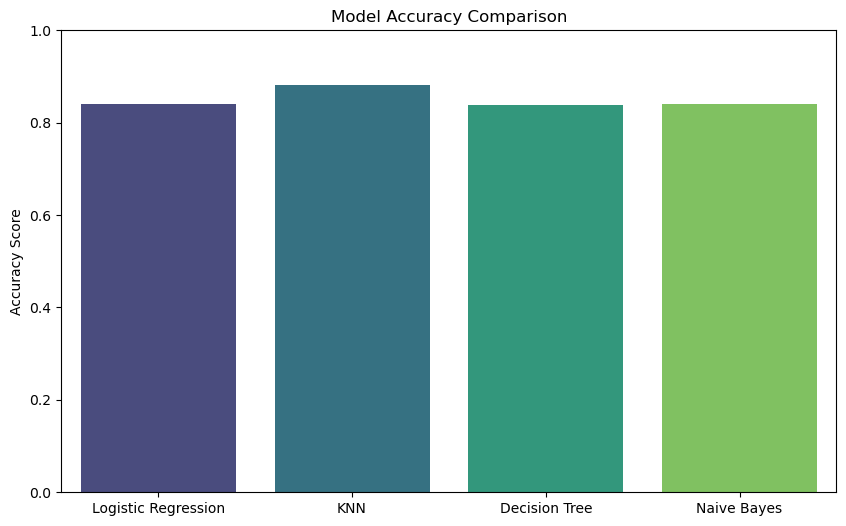

In [45]:
# Add Naive Bayes to the model comparison
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes']
accuracies = [logreg_acc, knn_acc, dtree_acc, nb_acc]

# Plotting the model accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.show()